# Project 1
## Cardiovascular Disease and Risk Factors
### Team 6
* Andrew Sooklall
* Varun Athreya
* Robert Mendoza
* Zane Lynch
* Guisha Ceus



In [1]:
#import dependencies
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pprint import pprint

#import extras
import requests
from scipy.stats import linregress
import time

# #import api
# import gmaps

# # Import API key
# from config import weather_api_key

In [2]:
#import CSV(s)
base_df = pd.read_csv("Resources/cvd_per_100k.csv")
base_df

,Location,Male Deaths,Female Deaths,Total Deaths,Cigarette Users,Hypertension,Obesity
0,Alabama,283.0,175.5,458.5,20900,41900,37100
1,Alaska,172.5,99.4,271.9,21000,31800,34700
2,Arizona,178.4,109.8,288.2,15600,30700,30100
3,Arkansas,277.8,178.9,456.7,22300,41300,36000
4,California,181.2,111.4,292.6,11300,28400,25700
5,Colorado,153.1,97.4,250.5,14600,25900,23100
6,Connecticut,178.5,113.4,291.9,12700,30500,27500
7,Delaware,197.1,127.3,324.4,17000,34900,32400
8,District of Columbia,243.5,149.2,392.7,14300,26700,23000
9,Florida,186.2,111.6,297.8,16100,34600,28900


Text(0, 0.5, 'Total Deaths')

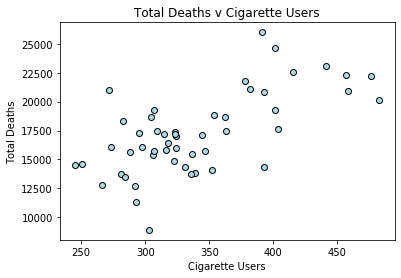

In [9]:
# data=base_df.loc[:, ["Total Deaths", "Cigarette Users"]]
#create plot 
plt.scatter(base_df["Total Deaths"],base_df["Cigarette Users"], c="lightblue", edgecolor="black")
plt.title("Total Deaths v Cigarette Users")
plt.xlabel("Cigarette Users")
plt.ylabel("Total Deaths")



<function matplotlib.pyplot.show(*args, **kw)>

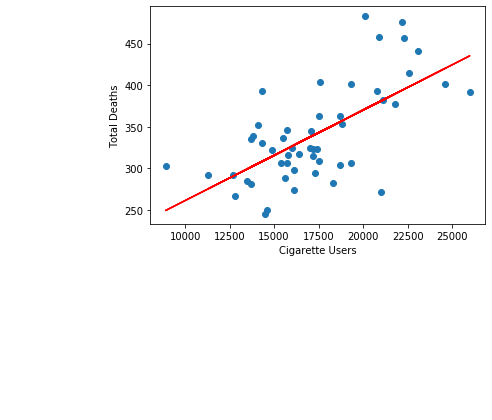

In [13]:
#linear regression
x_values = base_df['Cigarette Users']
y_values = base_df['Total Deaths']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Cigarette Users')
plt.ylabel('Total Deaths')
plt.show

# Analysis for Cigs
* 1
* 2
* 3

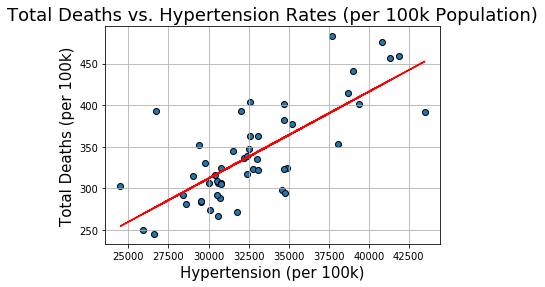

The r squared is: 0.5632791853418943
The p value is: 2.2797228638972336e-10
The line equation is: y = 0.01x + -0.59


In [5]:
#linear regression
x_values_htn = base_df['Hypertension']
y_values_htn = base_df['Total Deaths']
(htn_slope, htn_intercept, htn_rvalue, htn_pvalue, htn_stderr) = linregress(x_values_htn, y_values_htn)
regress_values_htn = x_values_htn * htn_slope + htn_intercept
line_eq_htn = "y = " + str(round(htn_slope,2)) + "x + " + str(round(htn_intercept,2))
                       
# total deaths vs hypertension
deaths_vs_htn = plt.scatter(base_df['Hypertension'],base_df['Total Deaths'],marker='o',edgecolor='black')
plt.plot(x_values_htn,regress_values_htn,"r-")
plt.grid()
plt.title('Total Deaths vs. Hypertension Rates (per 100k Population)',size=18)
plt.xlabel('Hypertension (per 100k)',size=15)
plt.ylabel("Total Deaths (per 100k)",size=15)
plt.show()


#r2
print(f'The r squared is: {htn_rvalue**2}')
print(f'The p value is: {htn_pvalue}')
print(f'The line equation is: {line_eq_htn}')

# Analysis for HTN
* 1
* 2
* 3

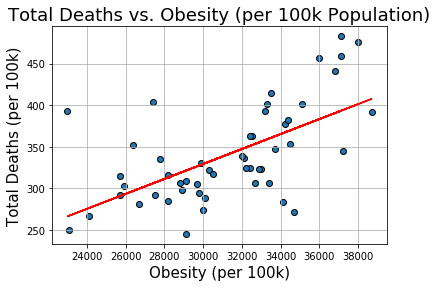

The r squared is: 0.3687160277203942
The p value is: 2.3079580843870332e-06
The line equation is: y = 0.01x + 59.48


In [6]:
#linear regression
x_values_obe = base_df['Obesity']
y_values_obe = base_df['Total Deaths']
(obe_slope, obe_intercept, obe_rvalue, obe_pvalue, obe_stderr) = linregress(x_values_obe, y_values_obe)
regress_values_obe = x_values_obe * obe_slope + obe_intercept
line_eq_obe = "y = " + str(round(obe_slope,2)) + "x + " + str(round(obe_intercept,2))
                       
# total deaths vs hypertension
deaths_vs_obesity = plt.scatter(base_df['Obesity'],base_df['Total Deaths'],marker='o',edgecolor='black')
plt.plot(x_values_obe,regress_values_obe,"r-")
plt.grid()
plt.title('Total Deaths vs. Obesity (per 100k Population)',size=18)
plt.xlabel('Obesity (per 100k)',size=15)
plt.ylabel("Total Deaths (per 100k)",size=15)
plt.show()


#r2
print(f'The r squared is: {obe_rvalue**2}')
print(f'The p value is: {obe_pvalue}')
print(f'The line equation is: {line_eq_obe}')

# Total Deaths v Obesity Analysis
* 1
* 2